# Image Compression with PCA

Here we use an exploratory data science technique called PCA, Principle Components Analysis, which tries to find the "components" that explain the most variance in the data (i.e. if you were to plot k dimensional data into a k dimensional space, what k vectors explain the most difference in data points?).

For a version of this exercise in R, see the following: https://www.r-bloggers.com/image-compression-with-principal-component-analysis/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

Let's load up an image

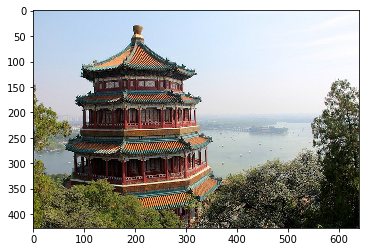

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ..., 
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ..., 
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]]], dtype=uint8)

In [3]:
original = load_sample_image("china.jpg")
plt.imshow(original)
plt.show()
original[0:2]

The data comes in a three dimensional array, the first representing the width, the second representing the height, and finally the third representing the color in RGB.  We preprocess the data to make it amenable to feed into a training model.

In [4]:
# Normalize the data to be in [0,1] - also cast to float.
img = np.array(original, dtype=np.float64) / 255

# split into three channels
img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]
img[:2], img_r[:2]

(array([[[ 0.68235294,  0.78823529,  0.90588235],
         [ 0.68235294,  0.78823529,  0.90588235],
         [ 0.68235294,  0.78823529,  0.90588235],
         ..., 
         [ 0.98039216,  0.98431373,  1.        ],
         [ 0.98039216,  0.98431373,  1.        ],
         [ 0.98039216,  0.98431373,  1.        ]],
 
        [[ 0.6745098 ,  0.78039216,  0.89803922],
         [ 0.67843137,  0.78431373,  0.90196078],
         [ 0.67843137,  0.78431373,  0.90196078],
         ..., 
         [ 0.98431373,  0.98823529,  1.        ],
         [ 0.98431373,  0.98823529,  1.        ],
         [ 0.98431373,  0.98823529,  1.        ]]]),
 array([[ 0.68235294,  0.68235294,  0.68235294, ...,  0.98039216,
          0.98039216,  0.98039216],
        [ 0.6745098 ,  0.67843137,  0.67843137, ...,  0.98431373,
          0.98431373,  0.98431373]]))

Let's run PCA to find the principle components.  These are the vectors that define a space for which we can project each row of pixels into.  By using fewer components, we can save less information about the picture, but we also lose some of the quality of the image.

In [11]:
# declare the model and fit it
comps = 15
pca_r = PCA(n_components=comps)
pca_g = PCA(n_components=comps)
pca_b = PCA(n_components=comps)
pca_r.fit(img_r)
pca_g.fit(img_g)
pca_b.fit(img_b)
pca_r.components_

array([[-0.02114066, -0.02220625, -0.02385707, ..., -0.06638216,
        -0.06512771, -0.06396354],
       [-0.01709467, -0.01561219, -0.01294291, ..., -0.01123384,
        -0.00995903, -0.01042454],
       [-0.03987023, -0.04455137, -0.04245385, ..., -0.05225167,
        -0.05256241, -0.05408303],
       ..., 
       [-0.04357665, -0.0479198 , -0.02589644, ..., -0.0171096 ,
        -0.03623092, -0.05041855],
       [ 0.03978289,  0.0489933 ,  0.03912276, ...,  0.00714687,
        -0.03306948, -0.0435157 ],
       [ 0.01037994, -0.02518251, -0.03321411, ...,  0.08072497,
         0.07548427,  0.07617427]])

In [12]:
# project all the channels into the reduced space
img_comp_r = pca_r.inverse_transform(pca_r.transform(img_r))
img_comp_g = pca_g.inverse_transform(pca_g.transform(img_g))
img_comp_b = pca_b.inverse_transform(pca_b.transform(img_b))

img_comp = np.dstack((img_comp_r, img_comp_g, img_comp_b))
img_comp[img_comp < 0] = 0
img_comp[img_comp > 1] = 1
img_comp[:2]

array([[[ 0.71696378,  0.78182463,  0.89317432],
        [ 0.71196489,  0.78424616,  0.90387456],
        [ 0.71314839,  0.79633286,  0.91373084],
        ..., 
        [ 0.95093951,  0.950907  ,  0.97115333],
        [ 0.93419448,  0.93174436,  0.96675947],
        [ 0.93493736,  0.93801893,  0.97484182]],

       [[ 0.71669707,  0.78192234,  0.89214197],
        [ 0.71170581,  0.78424636,  0.9029617 ],
        [ 0.71312207,  0.79641548,  0.91294711],
        ..., 
        [ 0.95271219,  0.9526421 ,  0.97133488],
        [ 0.93562392,  0.93324075,  0.96704505],
        [ 0.93635841,  0.93943289,  0.9750779 ]]])

In [19]:
pca_r.transform(img_r).shape

(427, 15)

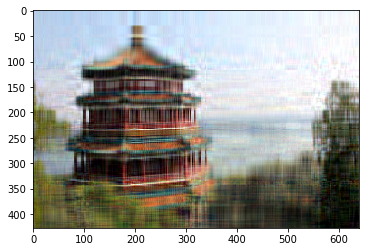

In [13]:
plt.imshow(img_comp)
plt.show()

In [14]:
from scipy import misc
misc.imsave('original.jpg', original)
misc.imsave('compressed.jpg', img_comp)